# Assignment 1: time series analysis

## Exercice 1

### a) and b) Importing the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### c) Solving the SDE

Using Ito's fomrula we get : \
$ln S(t) = ln S_0 + ( \mu - \frac{1}{2}\sigma^2)t + \sigma W_t $ \
Hence : \
$S(t) = S(0) \exp^{(\mu-\frac{1}{2}\sigma^2)t+\sigma W_t}$

##### i) We start by making the following assumptions and notations :

In [3]:
T = 10
nu = 0.06
sigma = 0.2
time = np.linspace(0,T,3650)
dt = time[1] - time[0]

##### ii) We generate then a Brownian motion :

In [4]:
dz = np.random.normal(size = (len(time)-1,)) * np.sqrt(dt)
z0 = np.zeros(shape = (1,))
z = np.concatenate((z0, np.cumsum(dz)))

##### iii) Finally we compute the time serie associated to that Brownian motion : 

In [5]:
#Generation of the time serie
S0 = 10 #We assume the price at time t=0 is 10
S = S0 * np.exp( (nu - (sigma ** 2)*0.5 ) * time + sigma * z)

### d) Plot of path of the daily share prices

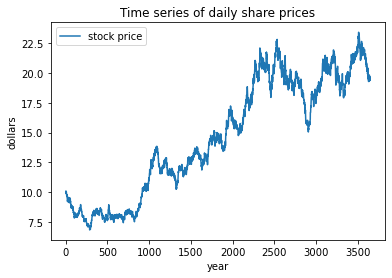

In [6]:
plt.plot(S, label='stock price')
plt.title('Time series of daily share prices')
plt.ylabel('dollars')
plt.xlabel('year')
plt.legend()
plt.show()

### e) We then compute the daily compounded returns.
We use the logs of the gross daily returns to do so. 

In [7]:
#log return
Rt = (S - np.roll(S, 1)) / np.roll(S, 1)
rt = np.log(1+Rt)
rt = np.delete(rt, 0)
print(rt)

[ 0.00775398 -0.00608084  0.00481092 ...  0.00890981 -0.00620671
  0.00192377]


### f)

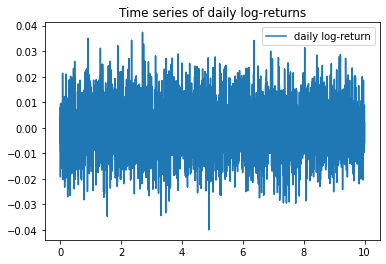

In [8]:
r_daily = np.log( S / np.roll(S,1) )
r_daily = np.delete(r_daily, 0)
plt.plot(time[1:3650], r_daily, label='daily log-return')
plt.title('Time series of daily log-returns')
plt.legend()
plt.show()
plt.show()

### g)

In [9]:
print(' The annualized estimated mean log-return is',np.mean(rt) * 365,'.')
print(' The annualized estimated log-return standard deviation is',np.std(rt) * np.sqrt(365),'.')

 The annualized estimated mean log-return is 0.06656579327199363 .
 The annualized estimated log-return standard deviation is 0.20046160260116294 .


## Exercice 2

### a) Importing the necessary libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### b) Using panda's series we simulate daily share prices from January 1st 2021 to December 31st 2021 
We assume 365 trading days in the year 

In [11]:
nu = 0.06
sigma = 0.2
time = pd.period_range('1950-01-01','2020-12-31',freq = 'D')
T = len(time)
dt = 1.0/365.0

In [12]:
dz = np.random.normal(size = (len(time)-1,)) * np.sqrt(dt)
z0 = np.zeros(shape = (1,))
z = np.concatenate((z0, np.cumsum(dz)))

In [13]:
S0 = 10
S = S0 * np.exp( np.cumsum((nu - (sigma ** 2)*0.5 ) * dt) + sigma * z)
serie = pd.Series(S, time)

### c) Number of observations

 Our sample has 25933 observations


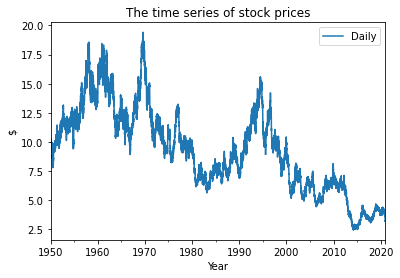

In [14]:
print(' Our sample has', len(serie), 'observations')
serie.plot(label='Daily')
plt.title('The time series of stock prices')
plt.ylabel('$')
plt.xlabel('Year')
plt.legend()
plt.show()

### d) and e)

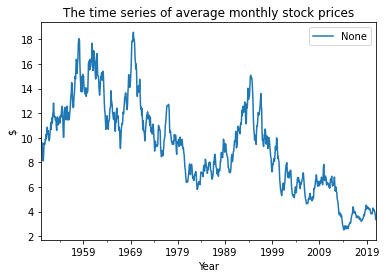

In [15]:
serie_monthly = serie.resample('M').mean()
serie_monthly.plot()
plt.title('The time series of average monthly stock prices')
plt.ylabel('$')
plt.xlabel('Year')
plt.legend()
plt.show()

## Exercice 3

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
#Assumptions
nu = 0.06
sigma = 0.2
time = pd.period_range('1950-01-01','2020-12-31',freq = 'D')
T = len(time)
dt = 1/365

In [18]:
#Brownian motion
dz = np.random.normal(size = (len(time)-1,)) * np.sqrt(dt)
z0 = np.zeros(shape = (1,))
z = np.concatenate((z0, np.cumsum(dz)))

In [19]:
#Simulation of the share price
S0 = 10
S = S0 * np.exp( np.cumsum((nu - (sigma ** 2)*0.5 ) * dt) + sigma * z)
serie = pd.Series(S, time)

### a) Generation of the log return for the different sampling frequencies

In [20]:
#Generation of the log return for the different sampling frequencies
r_daily = pd.Series(np.log(serie.values[:-1] / serie.values[1:]), time[:-1])

x = serie.resample('W').first()
r_weekly = pd.Series(np.log(x.values[:-1] / x.values[1:]), x.index[:-1])

x = serie.resample('M').first()
r_monthly = pd.Series(np.log(x.values[:-1] / x.values[1:]), x.index[:-1])

### b) Each frequency's summary 

In [21]:
r_daily.describe()

count    25932.000000
mean        -0.000023
std          0.010440
min         -0.041747
25%         -0.007099
50%         -0.000042
75%          0.007062
max          0.039856
dtype: float64

In [22]:
r_weekly.describe()

count    3705.000000
mean       -0.000155
std         0.027618
min        -0.089684
25%        -0.019245
50%        -0.000049
75%         0.018056
max         0.091923
dtype: float64

In [23]:
r_monthly.describe()

count    851.000000
mean      -0.000682
std        0.057454
min       -0.169947
25%       -0.039539
50%       -0.000701
75%        0.036894
max        0.177746
dtype: float64

### c) Annualized mean and standard deviation for each frequency

In [25]:
print(r_daily.mean() * 365)
print(r_daily.std() * np.sqrt(365))
print(r_weekly.mean() * 52)
print(r_weekly.std() * np.sqrt(52))
print(r_monthly.mean() * 12)
print(r_monthly.std() * np.sqrt(12))

-0.008359806645655724
0.19946266217434847
-0.00807337585946486
0.19915340230210413
-0.008180479697024179
0.19902568659735115


### d) Annualized mean and standard deviation of log-return with a one-year window for each frequency

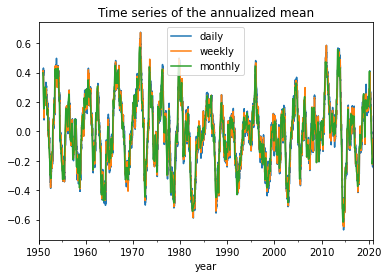

In [26]:
r_daily.rolling(365).mean().multiply(365).plot(label='daily')
r_weekly.rolling(52).mean().multiply(52).plot(label='weekly')
r_monthly.rolling(12).mean().multiply(12).plot(label='monthly')
plt.title('Time series of the annualized mean')
plt.xlabel('year')
plt.legend()
plt.show()

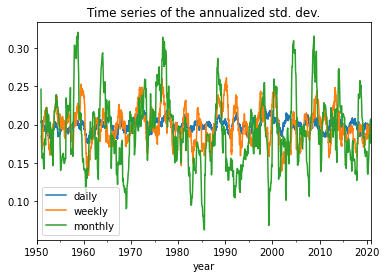

In [27]:
r_daily.rolling(365).std().multiply(np.sqrt(365)).plot(label='daily')
r_weekly.rolling(52).std().multiply(np.sqrt(52)).plot(label='weekly')
r_monthly.rolling(12).std().multiply(np.sqrt(12)).plot(label='monthly')
plt.title('Time series of the annualized std. dev.')
plt.xlabel('year')
plt.legend()
plt.show()

### e) How does the historical variation in the annualized mean and standard deviation estimates compare across sampling frequencies?
The mean does not vary with the sampling frequencies. As explained during the lecture, only the period described of the dataset has an impact. Making the horizon larger would reduce the noise of the estimation. \
Contrary to what we observe for the mean, the annualized standard deviation does vary with the sampling frequency: by increasing the frequency, the historical variation of the standard variation tightens around the true value $\sigma=2$, which was expectable from a theoretical point of view.

### f) 


In [26]:
#Time series of estimates
mean_estimates_daily = r_daily.resample('Y').mean().multiply(365)
var_estimates_daily = r_daily.resample('Y').var(ddof = 0).multiply(365)
estimates_daily = pd.concat([mean_estimates_daily, var_estimates_daily], axis = 1)

mean_estimates_monthly = r_monthly.resample('Y', kind = 'timestamp').mean().multiply(12)
var_estimates_monthly = r_monthly.resample('Y', kind = 'timestamp').var(ddof = 0).multiply(12)
estimates_monthly = pd.concat([mean_estimates_monthly, var_estimates_monthly], axis = 1)

estimates_monthly.head()

,0,1
1950-12-31,0.126054,0.037803
1951-12-31,-0.038502,0.012519
1952-12-31,-0.028286,0.043034
1953-12-31,0.235627,0.036940
1954-12-31,0.105187,0.020441


In [ ]:
estimates_daily.mean()plot()
estimates_monthly.plot()

In [27]:
print('The mean of the daily time serie is',estimates_daily.mean())
print('and its variance is',estimates_daily.var(),'.')
print('The mean of the monthly time serie is',estimates_monthly.mean())
print('and its variance is',estimates_monthly.var(),'.')

The mean of the daily time serie is 0   -0.029416
1    0.040144
dtype: float64
and its variance is 0    0.027087
1    0.000011
dtype: float64 .
The mean of the monthly time serie is 0   -0.029903
1    0.034980
dtype: float64
and its variance is 0    0.027236
1    0.000177
dtype: float64 .


In [28]:
print('The daily mean estimator mean is', mean_estimates_daily.mean())
print('and its variance is',mean_estimates_daily.var(),'.')
print('The monthly estimator mean is',mean_estimates_monthly.mean())
print('and its variance is',mean_estimates_monthly.var(),'.')

The daily mean estimator mean is -0.029416407925444796
and its variance is 0.027086517456755443 .
The monthly estimator mean is -0.029902875700009844
and its variance is 0.027235964819979242 .


In [29]:
print('The daily variance estimator mean is', var_estimates_daily.mean())
print('and its variance is',var_estimates_daily.var(),'.')
print('The monthly variance estimator mean is',var_estimates_monthly.mean())
print('and its variance is',var_estimates_monthly.var(),'.')

The daily variance estimator mean is 0.04014406677540706
and its variance is 1.0944492007006943e-05 .
The monthly variance estimator mean is 0.03497950453151642
and its variance is 0.0001773571132458481 .


The estimates for the mean for both sample frequencies have the same mean and variance. The estimates for variance have the same  mean but the variance of the estimates is higher for the monthly sample.

## Exercice 4

In [31]:
import wrds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### a)

In [32]:
db = wrds.Connection(wrds_username = 'zak_souid')

Loading library list...
Done


### b), c) and d)

In [34]:
apple = db.raw_sql("""select date,ret
                        from crsp.dsf 
                        where permco in (7)
                        and date>='2001-01-01'
                        and date<='2020-12-31'""")
apple.to_csv('apple.csv')
appledf=pd.read_csv('apple.csv')

GS = db.raw_sql("""select  date, ret
                        from crsp.dsf 
                        where permco in ( 35048)
                        and date>='2001-01-01'
                        and date<='2020-12-31'""")
GS.to_csv('GS.csv')
GSdf=pd.read_csv('GS.csv')

MSFT = db.raw_sql("""select date, ret
                        from crsp.dsf 
                        where permco in ( 8048)
                        and date>='2001-01-01'
                        and date<='2020-12-31'""")
MSFT.to_csv('MSFT.csv')
MSFTdf=pd.read_csv('MSFT.csv')

PG = db.raw_sql("""select date, ret
                        from crsp.dsf 
                        where permco in ( 21446)
                        and date>='2001-01-01'
                        and date<='2020-12-31'""")
PG.to_csv('PG.csv')
PGdf=pd.read_csv('PG.csv')

GE = db.raw_sql("""select date, ret
                        from crsp.dsf 
                        where permco in ( 20792)
                        and date>='2001-01-01'
                        and date<='2020-12-31'""")
GE.to_csv('GE.csv')
GEdf=pd.read_csv('GE.csv')

In [35]:
#generation of the time-serie S
S = pd.DataFrame(data = {'AAPL': np.log(appledf['ret'].values + 1), 'GS': np.log(GS['ret'].values + 1), 'MSFT': np.log(MSFT['ret'].values + 1), 'GE': np.log(GE['ret'].values + 1)},
                 index =  pd.to_datetime(appledf['date'].values))

### e) Analysis

In [36]:
S_d = S
S_w = S.resample('W').mean()
S_m = S.resample('M').mean()

In [37]:
print(S_d.describe())
print(S_w.describe())
print(S_m.describe())

              AAPL           GS         MSFT           GE
count  5284.000000  5284.000000  5284.000000  5284.000000
mean      0.001260     0.000290     0.000605    -0.000148
std       0.022862     0.022359     0.018053     0.021017
min      -0.197470    -0.210223    -0.159453    -0.164394
25%      -0.009418    -0.009845    -0.007694    -0.008607
50%       0.000956     0.000341     0.000383     0.000000
75%       0.012588     0.010757     0.008978     0.008487
max       0.130194     0.234818     0.170626     0.179844
              AAPL           GS         MSFT           GE
count  1096.000000  1096.000000  1096.000000  1096.000000
mean      0.001281     0.000349     0.000637    -0.000142
std       0.010069     0.010003     0.007513     0.009255
min      -0.055694    -0.073129    -0.040455    -0.045776
25%      -0.004309    -0.004626    -0.003236    -0.003959
50%       0.001608     0.000681     0.000571    -0.000066
75%       0.007164     0.005330     0.004473     0.004264
max       0.04

In [38]:
print(S_d.mean().multiply(365))
print(S_w.mean().multiply(52))
print(S_m.mean().multiply(12))

print(S_d.std().multiply(np.sqrt(365)))
print(S_d.std().multiply(np.sqrt(52)))
print(S_d.std().multiply(np.sqrt(12)))

AAPL    0.459983
GS      0.105727
MSFT    0.220982
GE     -0.054171
dtype: float64
AAPL    0.066596
GS      0.018173
MSFT    0.033117
GE     -0.007376
dtype: float64
AAPL    0.014726
GS      0.003405
MSFT    0.006990
GE     -0.001690
dtype: float64
AAPL    0.436775
GS      0.427164
MSFT    0.344897
GE      0.401529
dtype: float64
AAPL    0.164859
GS      0.161232
MSFT    0.130180
GE      0.151556
dtype: float64
AAPL    0.079196
GS      0.077453
MSFT    0.062537
GE      0.072805
dtype: float64


<AxesSubplot:>

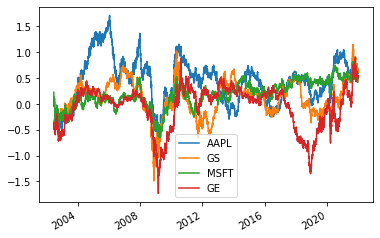

In [39]:
S_d.rolling(365).mean().multiply(365).plot()
plt.title('Time series of the annualized mean - daily')
plt.xlabel('year')
plt.legend()
plt.show()

<AxesSubplot:>

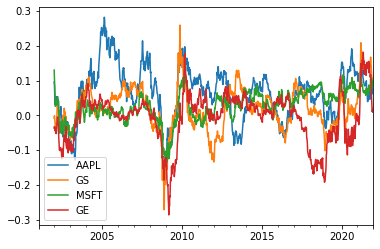

In [40]:
S_w.rolling(52).mean().multiply(52).plot()
plt.title('Time series of the annualized mean - weekly')
plt.xlabel('year')
plt.legend()
plt.show()

<AxesSubplot:>

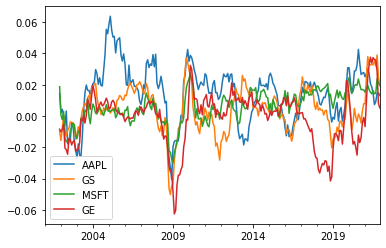

In [41]:
S_m.rolling(12).mean().multiply(12).plot()
plt.title('Time series of the annualized mean - monthly')
plt.xlabel('year')
plt.legend()
plt.show()

<AxesSubplot:>

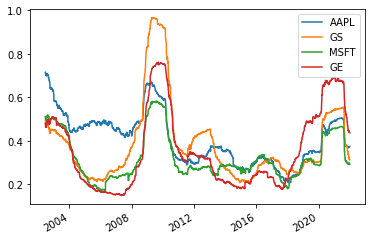

In [42]:
S_d.rolling(365).std().multiply(np.sqrt(365)).plot()
plt.title('Time series of the annualized std dev - daily')
plt.xlabel('year')
plt.legend()
plt.show()

<AxesSubplot:>

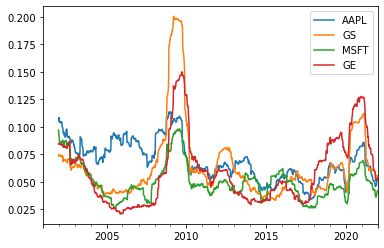

In [43]:
S_w.rolling(52).std().multiply(np.sqrt(52)).plot()
plt.title('Time series of the annualized std dev - weekly')
plt.xlabel('year')
plt.legend()
plt.show()

<AxesSubplot:>

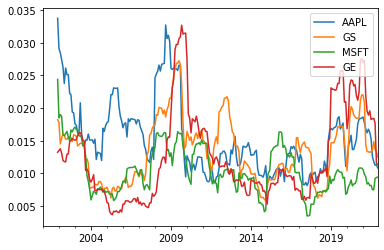

In [44]:
S_m.rolling(12).std().multiply(np.sqrt(12)).plot()
plt.title('Time series of the annualized std dev - monthly')
plt.xlabel('year')
plt.legend()
plt.show()

### f) How does the variation in the mean and standard deviation estimates compare across sampling frequencies? How does the pattern you observe compare to the pattern you observed with the simulated data? If you observe a similar pattern, why? If you observe some differences, what could be the reason behind this?

We can observe that the weekly and monthly mean are usually quite similar and close while the daily mean doesn't follow them and is often smaller in absolute value than the weekly and monthly ones.\
Regarding the standard deviation we can see from the last graph that there are big differences among frequencies: the higher the frequency the smaller the variance.\
With downloanded data the standard deviation is generally bigger than with simulated ones; we can notice also that the variation of the standard deviation is smaller in this last case. It seems that creating an expected return estimator is harder when using real data.\
With the real data the range of the time-series of the rolling standard deviation is very wide, and remains wide even at a high sampling frequency. 
A big limitation of our model is the source of the issue : it needs the volatility to be constant and it is not as volatility itself is always varying. 



### g) How do the estimates change as we go through the COVID Crisis window? Do you observe other crises through estimations?

During the COVID pandemic window, the estimates for mean plummets and the estimates for standard deviation grows larger. We can observe similar behavior during the subprime crisis in 2008.\
Howevern comparing with the subprime crisis, the COVID Crisis has a smaller effect on estimations of the mean.

